# COMP24111 - Exercise 2: News Article Classification

## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (1), "crude" (2), "trade" (3) and "interest" (4).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

## 2. Preparation

First we need to import the data.
Run the below cell to load the data using NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To take advantage of the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

In [2]:
print(data[41]) # Sparse, will print the non-zero indices and their values.
print(data[41].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector.
# print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix.
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document.
print(vocabulary[columns]) # Prints the words present in the 42nd document.

  (0, 2)	1
  (0, 3)	3
  (0, 5)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 21)	2
  (0, 24)	1
  (0, 105)	1
  (0, 127)	1
  (0, 227)	1
  (0, 275)	1
  (0, 334)	2
  (0, 341)	1
  (0, 348)	1
  (0, 359)	1
  (0, 411)	1
  (0, 426)	1
  (0, 1428)	1
  (0, 2058)	1
  (0, 5555)	1
[[0 0 1 ... 0 0 0]]
['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [3]:
print(", ".join(vocabulary))

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [4]:
i, j = 40, 2
print(data[i,j])

4


You can see which class the $i$th article belongs to using

In [5]:
print(labels[i])

0


For instance, by running

In [6]:
print("Occurrences:", data[0,10])
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10])

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [7]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [8]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [ 14 246 249 527 570 475 690 788 775 600]
Samples:   (0, 5110)	1
  (0, 5109)	1
  (0, 622)	2
  (0, 414)	1
  (0, 349)	1
  (0, 346)	1
  (0, 341)	1
  (0, 331)	1
  (0, 330)	2
  (0, 99)	1
  (0, 21)	2
  (0, 19)	1
  (0, 13)	1
  (1, 4300)	1
  (1, 4299)	1
  (1, 4298)	1
  (1, 4297)	1
  (1, 4296)	1
  (1, 4295)	1
  (1, 4294)	1
  (1, 4293)	1
  (1, 4292)	1
  (1, 4291)	1
  (1, 4290)	1
  (1, 4178)	1
  :	:
  (9, 309)	1
  (9, 292)	2
  (9, 270)	1
  (9, 244)	1
  (9, 243)	1
  (9, 242)	1
  (9, 240)	1
  (9, 239)	1
  (9, 224)	1
  (9, 223)	1
  (9, 211)	3
  (9, 209)	2
  (9, 198)	1
  (9, 188)	2
  (9, 179)	1
  (9, 157)	2
  (9, 143)	1
  (9, 140)	2
  (9, 99)	1
  (9, 98)	1
  (9, 60)	1
  (9, 32)	3
  (9, 13)	1
  (9, 5)	7
  (9, 4)	1
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN implementation

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance.
It should take a set of training samples, a user-specified neighour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to complete this function, you will need the `sklearn.metrics.pairwise_distances` function which can handle sparse matrices, below imported as `cdist` to follow SciPy conventions (not to be confused with the `pdist` function).
You should also research NumPy functions relating to sorting.

**Your implementation must NOT make use of Python loops over individual samples**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.

In [9]:
from scipy import stats
from sklearn.metrics import pairwise_distances as cdist

def knn_classify(test_samples, training_data, training_labels, metric, k):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    # Calculate an m x n distance matrix.
    pairwise_distance = cdist(test_samples, training_data, metric)
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    nearest_neighbours = (pairwise_distance.argsort(axis=1))[:, :k]

    # Look up the classes corresponding to each index.
    nearest_labels = training_labels[nearest_neighbours]
    
    # Return the most frequent class on each row.
    # Note: Ensure that the returned vector does not contain any empty dimensions.
    # You may find the squeeze method useful here.
    #arrays to store results from stats.mode, as it returns 2 arrays
    mostFrequentClass, modeCount = stats.mode(nearest_labels, axis=1)
    mostFrequentClass = np.squeeze(mostFrequentClass, axis = 1)
    return mostFrequentClass

## 4. Experiments

Use your k-NN function to perform the following experiments.

### Experiment 1

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Select an appropriate neighbour number.
Train your k-NN classifier using the Euclidean distance and test it.
Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies.

In [10]:
import statistics
import numpy as np
import scipy.stats
#array to store results from trials, of both accuracy and error rates
resultsAccuracy = list()
resultsError = list()
#perform 20 trials
for count in range(20):
    #list 80 indices from each class, 320 total
    training_sample_indices = sample_indices(labels, 80, 80, 80, 80)
    #creat a list of the remaining indices, 800 without the ones in training_sample_indices, 480 total
    test_data_indices = list(range(800))
    for num in training_sample_indices:
        test_data_indices.remove(num)

    #create sparse matrices of data
    training_sample = data[training_sample_indices]
    test_data = data[test_data_indices]
    #set labels of training_samples
    training_labels = labels[training_sample_indices]
    #set neighbour number
    k = 5
    predicted_classes_e = knn_classify(test_data, training_sample, training_labels, "euclidean", k)
    #since the data is organized sequentially, it is known that the first 120 belong to class 0, the next 120 to class 1 etc.
    #the count is the number of correctly identified sameples, dividing by the total sample number, 480, will give the classification accuracy
    correctSamples = 0
    for classConsidered in range(4):
        for x in range(classConsidered*120, (classConsidered+1)*120):
            if(predicted_classes_e[x] == classConsidered):
                correctSamples = correctSamples+1
    classificationAccuracy = correctSamples/len(predicted_classes_e)
    classificationError = (1 - classificationAccuracy)
    resultsAccuracy.append(classificationAccuracy)
    resultsError.append(classificationError)
#calculating the mean and standard deviation of from the results of 20 trials of the accuracy and error rates
meanAccuracy = sum(resultsAccuracy)/len(resultsAccuracy)
standardDeviationAccuracy = statistics.stdev(resultsAccuracy)
meanError = sum(resultsError)/len(resultsError)

print("Using Euclidean Distance:")
print("Classification accuracy mean: ", meanAccuracy)
print("Classification accuracy standard deviation: ", standardDeviationAccuracy)
print("Classification Error mean: ", meanError)
print("Standard deviation is the same\n")


Using Euclidean Distance:
Classification accuracy mean:  0.8670833333333332
Classification accuracy standard deviation:  0.03009639727035398
Classification Error mean:  0.13291666666666666
Standard deviation is the same



Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

In [11]:
import statistics
import numpy as np
import scipy.stats
#array to store results from trials, of both accuracy and error rates
resultsAccuracy = list()
resultsError = list()
#perform 20 trials
for count in range(20):
    #list 80 indices from each class, 320 total
    training_sample_indices = sample_indices(labels, 80, 80, 80, 80)
    #creat a list of the remaining indices, 800 without the ones in training_sample_indices, 480 total
    test_data_indices = list(range(800))
    for num in training_sample_indices:
        test_data_indices.remove(num)

    #create sparse matrices of data
    training_sample = data[training_sample_indices]
    test_data = data[test_data_indices]
    #set labels of training_samples
    training_labels = labels[training_sample_indices]
    #set neighbour number
    k = 5
    predicted_classes_c = knn_classify(test_data, training_sample, training_labels, "cosine", k)
    #since the data is organized sequentially, it is known that the first 120 belong to class 0, the next 120 to class 1 etc.
    #the count is the number of correctly identified sameples, dividing by the total sample number, 480, will give the classification accuracy
    correctSamples = 0
    for classConsidered in range(4):
        for x in range(classConsidered*120, (classConsidered+1)*120):
            if(predicted_classes_c[x] == classConsidered):
                correctSamples = correctSamples+1
    classificationAccuracy = correctSamples/len(predicted_classes_c)
    classificationError = (1 - classificationAccuracy)
    resultsAccuracy.append(classificationAccuracy)
    resultsError.append(classificationError)
#calculating the mean and standard deviation of from the results of 20 trials of the accuracy and error rates
meanAccuracy = sum(resultsAccuracy)/len(resultsAccuracy)
standardDeviationAccuracy = statistics.stdev(resultsAccuracy)
meanError = sum(resultsError)/len(resultsError)

print("Using Cosine Distance:")
print("Classification accuracy mean: ", meanAccuracy)
print("Classification accuracy standard deviation: ", standardDeviationAccuracy)
print("Classification Error mean: ", meanError)
print("Standard deviation is the same\n")

Using Cosine Distance:
Classification accuracy mean:  0.9618749999999998
Classification accuracy standard deviation:  0.007798049501214498
Classification Error mean:  0.038124999999999985
Standard deviation is the same



Which distance measure gives better performance?

### Experiment 2

Using the distance measure that you found performs better, repeat the same experiment, varying the neighbour number $k$ from 1 to 50.
This time, record the average training errors and standard deviation over 20 trials, for different values of $k$.
Do the same for testing errors.

In [12]:
import statistics
import numpy as np
import scipy.stats

#dictionary to store values
testing_errors_dict = {}
#varying values of K from 1 to 50
for k in range(1, 51):
    #array to store results from trials, of both accuracy and error rates
    resultsAccuracy = list()
    #perform 20 trials
    for count in range(20):
        #list 80 indices from each class, 320 total
        training_sample_indices = sample_indices(labels, 80, 80, 80, 80)
        #creat a list of the remaining indices, 800 without the ones in training_sample_indices, 480 total
        test_data_indices = list(range(800))
        for num in training_sample_indices:
            test_data_indices.remove(num)

        #create sparse matrices of data
        training_sample = data[training_sample_indices]
        test_data = data[test_data_indices]
        #set labels of training_samples
        training_labels = labels[training_sample_indices]

        predicted_classes_test = knn_classify(test_data, training_sample, training_labels, "cosine", k)
        #since the data is organized sequentially, it is known that the first 120 belong to class 0, the next 120 to class 1 etc.
        #the count is the number of correctly identified sameples, dividing by the total sample number, 480, will give the classification accuracy
        correctSamples = 0
        for classConsidered in range(4):
            for x in range(classConsidered*120, (classConsidered+1)*120):
                if(predicted_classes_test[x] == classConsidered):
                    correctSamples = correctSamples+1
        classificationAccuracy = correctSamples/len(predicted_classes_test)
        resultsAccuracy.append(classificationAccuracy)
    #calculating the mean and standard deviation of from the results of 20 trials of the accuracy and error rates
    meanAccuracy = sum(resultsAccuracy)/len(resultsAccuracy)
    standardDeviationAccuracy = statistics.stdev(resultsAccuracy)

    #a two entry dictionary for storing the mean and standard deviation for that value of K
    statsForCurrentKValue = {"mean" : meanAccuracy, "standardDeviation" : standardDeviationAccuracy}
    #nserting this dictionary entry into the main dictionary
    testing_errors_dict[k-1] = statsForCurrentKValue
#testing_errors_dict contains all data 0 - 49
print(testing_errors_dict)
#dictionary to store values
training_errors_dict = {}
#varying values of K from 1 to 50
for k in range(1, 51):
    #list to store results from trials
    training_resultsAccuracy = list()
    #perform 20 trials
    for count in range(20):
        #list 80 indices from each class, 320 total
        training_sample_indices = sample_indices(labels, 80, 80, 80, 80)

        #create sparse matrices of data
        training_sample = data[training_sample_indices]
        #set labels of training_samples
        training_labels = labels[training_sample_indices]

        predicted_classes_train = knn_classify(training_sample, training_sample, training_labels, "cosine", k)
        
        correctSamples = 0
        for classConsidered in range(4):
            for x in range(classConsidered*80, (classConsidered+1)*80):
                if(predicted_classes_train[x] == classConsidered):
                    correctSamples = correctSamples+1
        classificationAccuracy = correctSamples/len(predicted_classes_train)
        training_resultsAccuracy.append(classificationAccuracy)
    #calculating the mean and standard deviation of from the results of 20 trials of the accuracy and error rates
    meanAccuracy = sum(training_resultsAccuracy)/len(training_resultsAccuracy)
    standardDeviationAccuracy = statistics.stdev(training_resultsAccuracy)

    #a two entry dictionary for storing the mean and standard deviation for that value of K
    statsForCurrentKValue = {"mean" : meanAccuracy, "standardDeviation" : standardDeviationAccuracy}
    #nserting this dictionary entry into the main dictionary
    training_errors_dict[k-1] = statsForCurrentKValue
#training_errors_dict contains all data 0 - 49
print(training_errors_dict)

{0: {'mean': 0.9628125000000001, 'standardDeviation': 0.007803174258516323}, 1: {'mean': 0.9559374999999999, 'standardDeviation': 0.0087420337587867}, 2: {'mean': 0.9609375000000002, 'standardDeviation': 0.008051001308907069}, 3: {'mean': 0.9609374999999998, 'standardDeviation': 0.009815434013992505}, 4: {'mean': 0.9627083333333333, 'standardDeviation': 0.008275567329185525}, 5: {'mean': 0.9595833333333333, 'standardDeviation': 0.010759702543769942}, 6: {'mean': 0.9605208333333332, 'standardDeviation': 0.007925174329810969}, 7: {'mean': 0.9582291666666665, 'standardDeviation': 0.007357161993754059}, 8: {'mean': 0.9579166666666667, 'standardDeviation': 0.009429059536490904}, 9: {'mean': 0.9558333333333333, 'standardDeviation': 0.010061942658278249}, 10: {'mean': 0.9608333333333332, 'standardDeviation': 0.009233211412204102}, 11: {'mean': 0.9588541666666668, 'standardDeviation': 0.007400503529178279}, 12: {'mean': 0.9567708333333333, 'standardDeviation': 0.007431307006873654}, 13: {'mean

Produce an error bar plot showing the training accuracy for each $k$ here:

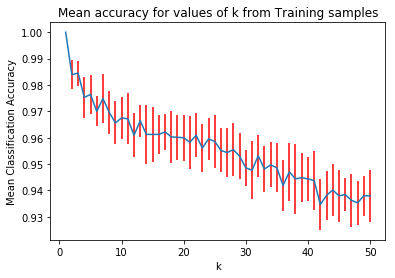

In [13]:
from matplotlib import pyplot as plt
k_plot = list(range(1, 51))
y = list()
yerr = list()
for entry in range(50):
    y.append(training_errors_dict[entry]["mean"])
    yerr.append(training_errors_dict[entry]["standardDeviation"])
for i in range(50):
    yerr[i] = yerr[i] * y[i]
plt.errorbar(k_plot, y, yerr, ecolor="r")
plt.xlabel("k")
plt.ylabel("Mean Classification Accuracy")
plt.title("Mean accuracy for values of k from Training samples")
plt.show()


Produce your testing error bar plot here:

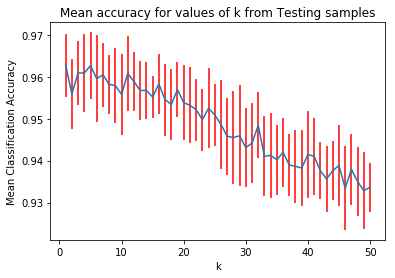

In [14]:
from matplotlib import pyplot as plt
k_plot = list(range(1, 51))
y = list()
yerr = list()
for entry in range(50):
    y.append(testing_errors_dict[entry]["mean"])
    yerr.append(testing_errors_dict[entry]["standardDeviation"])
for i in range(50):
    yerr[i] = yerr[i] * y[i]
plt.errorbar(k_plot, y, yerr, ecolor="r")
plt.xlabel("k")
plt.ylabel("Mean Classification Accuracy")
plt.title("Mean accuracy for values of k from Testing samples")
plt.show()

**Remember that all graphs should have axis labels and a title.**

Now, answer a few questions according to what you have observed.

Q1. What is the training accuracy obtained when $k=1$? Explain it.

Q2. Do the testing and training accuracies differ, and why?

Q3. How do the accuracies change as $k$ gets bigger, and why?

### Experiment 3

Compare three 5-NN classifiers using cosine distance.
First, randomly select 100 articles per class and keep these as your testing samples.

In [15]:
#list 100 indices from each class, 400 total
test_data_indices400 = sample_indices(labels, 100, 100, 100, 100)
#creat a list of the remaining indices, 800 without the ones in training_sample_indices, 400 total
training_data_indices400 = list(range(800))
for num in test_data_indices400:
    training_data_indices400.remove(num)

#create sparse matrices of data
training_data400 = data[training_data_indices400]
test_data400 = data[test_data_indices400]
#set labels of training_samples
training_labels = labels[training_data_indices400]

Then do the following:

(1) Train the first classifier using all the remaining articles.
Compute the confusion matrix for the 4 classes using the testing samples.

In [16]:
predicted_classes = knn_classify(test_data400, training_data400, training_labels, "cosine", 5)
#to store the values for the confusion matrix for  that class
confusionMatrixDict = {}

#loop through all classes
for classConsidered in range(4):
    #reintialize variables
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    #need to loop through all values of predicted_classes
    for x in range(400):
        #consider own class, True Positives and False Negatives
        if(x >= classConsidered*100 and x < (classConsidered+1)*100):
            if(predicted_classes[x] == classConsidered):
                TP = TP + 1
            else:
                FN = FN + 1
    #loop through all values not in that class, False Positives and True Negatives
        else:
            if(predicted_classes[x] == classConsidered):
                FP = FP + 1
            else:
                TN = TN + 1
    confusionMatrixDict[classConsidered] = {"TruePositive" : TP, "FalsePositive" : FP, "TrueNegative" : TN, "FalseNegative" : FN}
print(confusionMatrixDict,"\n")
print(predicted_classes)
for i in range(4):
    print("The confusion matrix for class ", i+1,":")
    print(confusionMatrixDict[i])

{0: {'TruePositive': 98, 'FalsePositive': 1, 'TrueNegative': 299, 'FalseNegative': 2}, 1: {'TruePositive': 97, 'FalsePositive': 1, 'TrueNegative': 299, 'FalseNegative': 3}, 2: {'TruePositive': 99, 'FalsePositive': 2, 'TrueNegative': 298, 'FalseNegative': 1}, 3: {'TruePositive': 98, 'FalsePositive': 4, 'TrueNegative': 296, 'FalseNegative': 2}} 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 1 3 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 

(2) Randomly remove 95 training articles from class 2.
Train the second classifier using the reduced training samples.
Compute the confusion matrix for the 4 classes using the testing samples.

In [17]:
#take 95 interges from original sample of class 2 to remove
toRemove = np.random.choice(training_data_indices400[100:200], 95, replace=False)
#initialize new training data
training_data_indices_c2 = training_data_indices400.copy()
#remove those integers
for num in toRemove:
    training_data_indices_c2.remove(num)
#now training_data_indices_c2 has only 305 numbers
#assign labels
training_labels_c2 = labels[training_data_indices_c2]
#initialize data
training_data_c2 = data[training_data_indices_c2]

predicted_classes_c2 = knn_classify(test_data400, training_data_c2, training_labels_c2, "cosine", 5)


#to store the values for the confusion matrix for  that class
confusionMatrixDict_c2 = {}

#loop through all classes
for classConsidered in range(4):
    #reintialize variables
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    #need to loop through all values of predicted_classes
    for x in range(400):
        #consider own class, True Positives and False Negatives
        if(x >= classConsidered*100 and x < (classConsidered+1)*100):
            if(predicted_classes_c2[x] == classConsidered):
                TP = TP + 1
            else:
                FN = FN + 1
    #loop through all values not in that class, False Positives and True Negatives
        else:
            if(predicted_classes_c2[x] == classConsidered):
                FP = FP + 1
            else:
                TN = TN + 1
    confusionMatrixDict_c2[classConsidered] = {"TruePositive" : TP, "FalsePositive" : FP, "TrueNegative" : TN, "FalseNegative" : FN}
print(confusionMatrixDict_c2,"\n")
print(predicted_classes_c2)
for i in range(4):
    print("The confusion matrix for class ", i+1,":")
    print(confusionMatrixDict_c2[i])

{0: {'TruePositive': 98, 'FalsePositive': 23, 'TrueNegative': 277, 'FalseNegative': 2}, 1: {'TruePositive': 49, 'FalsePositive': 0, 'TrueNegative': 300, 'FalseNegative': 51}, 2: {'TruePositive': 99, 'FalsePositive': 22, 'TrueNegative': 278, 'FalseNegative': 1}, 3: {'TruePositive': 98, 'FalsePositive': 11, 'TrueNegative': 289, 'FalseNegative': 2}} 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 2 1 0 1 1
 1 2 1 1 0 1 0 1 1 0 2 2 1 1 1 1 2 1 0 0 2 0 0 2 1 1 1 3 1 0 0 0 2 1 1 1 1
 0 3 3 3 3 0 1 0 1 0 1 0 1 0 3 1 1 1 1 0 2 1 2 1 2 2 2 1 3 0 1 0 0 1 1 2 1
 1 3 2 0 1 2 2 1 0 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 

(3) Redo (2), but randomly remove 95 training articles from *all* the classes.
Train the third classifier using the new training data.
Compute the confusion matrix for the 4 classes using the testing samples.

In [18]:
#initialize new list
training_data_indices_cAll = list()
#add only 5 from each class
for x in range(4):
    training_data_indices_cAll.extend(np.random.choice(training_data_indices400[100*x:100*(x+1)], 5, replace=False))

#initialize labels
training_labels_cAll = labels[training_data_indices_cAll]

#initialize data
training_data_cAll = data[training_data_indices_cAll]

predicted_classes_cAll = knn_classify(test_data400, training_data_cAll, training_labels_cAll, "cosine", 5)

#to store the values for the confusion matrix for  that class
confusionMatrixDict_cAll = {}

#loop through all classes
for classConsidered in range(4):
    #reintialize variables
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    #need to loop through all values of predicted_classes
    for x in range(400):
        #consider own class, True Positives and False Negatives
        if(x >= classConsidered*100 and x < (classConsidered+1)*100):
            if(predicted_classes_cAll[x] == classConsidered):
                TP = TP + 1
            else:
                FN = FN + 1
    #loop through all values not in that class, False Positives and True Negatives
        else:
            if(predicted_classes_cAll[x] == classConsidered):
                FP = FP + 1
            else:
                TN = TN + 1
    confusionMatrixDict_cAll[classConsidered] = {"TruePositive" : TP, "FalsePositive" : FP, "TrueNegative" : TN, "FalseNegative" : FN}
print(confusionMatrixDict_cAll,"\n")
print(predicted_classes_cAll)
for i in range(4):
    print("The confusion matrix for class ", i+1,":")
    print(confusionMatrixDict_cAll[i])

{0: {'TruePositive': 98, 'FalsePositive': 11, 'TrueNegative': 289, 'FalseNegative': 2}, 1: {'TruePositive': 84, 'FalsePositive': 1, 'TrueNegative': 299, 'FalseNegative': 16}, 2: {'TruePositive': 93, 'FalsePositive': 19, 'TrueNegative': 281, 'FalseNegative': 7}, 3: {'TruePositive': 87, 'FalsePositive': 7, 'TrueNegative': 293, 'FalseNegative': 13}} 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 3 2 3 1 1 1 1 0 1 1 1 0 3 1 1 1 1 1 1 2 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 3 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 3 3 3 3 3 3 3 2 3 2 3 3 3 3 0 3 3 3 3 

Repeat the whole thing a few times.
Which of the three classifiers performs the worst?
Try to analyse why this might be.

## 5. Deliverables and Marking

By the deadline, you should submit one single Jupyter file using GitLab.
Please find the coursework submission instruction from the following link:
https://wiki.cs.manchester.ac.uk/index.php/UGHandbook19:Coursework

This exercise is worth 15 marks — marks will be allocated roughly on the basis of:
* rigorous experimentation,
* knowledge displayed when talking to the TA,
* problem solving skill,
* self-learning ability,
* how informative and well presented your graphs are,
* language and ease of reading.

You must be able to explain any code you've written in order to get full marks. During the marking session we will ask you to run all cells in your Jupyter file, so ensure that the file is runnable using the "Restart Kernel and Run All Cells" menu option.

The lab is marked out of 15:

|                          |         |
|:------------------------ |--------:|
| k-NN Implementation      | 3 marks |
| Experiment 1             | 4 marks |
| Experiment 2             | 4 marks |
| Experiment 3             | 4 marks |